<a href="https://colab.research.google.com/github/salonii1030/CV/blob/main/CV_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from PIL import Image
import cv2

def get_partial_annotated_image(original_image_path, fully_annotated_image_path, partially_annotated_image_path):
    # Load the original and annotated images
    original_image = cv2.imread(original_image_path)
    annotated_image = cv2.imread(fully_annotated_image_path)

    # Convert images to arrays for easier manipulation
    original_array = np.array(original_image)
    annotated_array = np.array(annotated_image)

    # Determine the regions of interest (ROIs) in the annotated image
    roi_indices = np.where(np.all(annotated_array == [127,127,127], axis=-1))

    # Copy the annotated regions onto the original image
    original_array[roi_indices] = annotated_array[roi_indices]

    # Create a new PIL image from the modified array
    # partially_annotated_image = Image.fromarray(original_array)
    partially_annotated_image = cv2.cvtColor(original_array, cv2.COLOR_BGR2RGB)

    # print(type(partially_annotated_image))
    # print(type(original_image))

    pp = cv2.bitwise_and(original_image,partially_annotated_image)

    # Save the partially annotated image
    # partial_annotated_image.save(output_image_path)
    cv2.imwrite(partially_annotated_image_path,pp)

original_image_path = 'original_image.jpg'
annotated_image_path = 'fully_annotated_image.jpg'
output_image_path = 'partially_annotated_image1.jpg'

get_partial_annotated_image(original_image_path, annotated_image_path, output_image_path)


In [ ]:
#using egde detection as per GUVI session................
import cv2
import numpy as np

# Load the original image and the fully annotated image
original_image = cv2.imread("original_image.jpg")
annotated_image = cv2.imread("fully_annotated_image.jpg")

# Resize images to have the same dimensions
original_image = cv2.resize(original_image, (annotated_image.shape[1], annotated_image.shape[0]))

# Perform edge detection on both images to extract the edges
original_edges = cv2.Canny(original_image, 100, 150)
annotated_edges = cv2.Canny(annotated_image, 100, 150)

# Subtract the edges of the annotated image from the edges of the original image to remove the dog annotation
partial_edges = original_edges - annotated_edges

# Create a binary mask from the partial edges
_, partial_mask = cv2.threshold(partial_edges, 127, 255, cv2.THRESH_BINARY)

# Apply the binary mask to the original image to retain the cat annotation
partial_annotation = cv2.bitwise_and(original_image, original_image, mask=partial_mask)

# Save the resulting partially annotated image
cv2.imwrite("partial_annotated_image.jpg", partial_annotation)


True

In [ ]:
#detecting edges for fully annotated image............
import cv2

# Load the fully annotated image
annotated_image = cv2.imread("fully_annotated_image.jpg")

# Convert the image to grayscale
gray_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2GRAY)

# Perform edge detection using Canny
edges_fully = cv2.Canny(gray_image, 100, 100)

# Display or save the resulting edge map
cv2.imwrite("ED.jpg", edges_fully)


True

In [ ]:
#detecting edges for original image............
import cv2

# Load the fully annotated image
annotated_image = cv2.imread("original_image.jpg")

# Convert the image to grayscale
gray_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2GRAY)

# Perform edge detection using Canny
edges = cv2.Canny(gray_image, 100, 100)

# Display or save the resulting edge map
cv2.imwrite("OED.jpg", edges)

True

In [ ]:
resize_image = cv2.resize(edges, (edges_fully.shape[1],edges_fully.shape[0]))


In [ ]:
pt = resize_image-edges_fully
cv2.imwrite("pt_img.jpg",pt)

True

In [ ]:
_, binary_mask = cv2.threshold(pt, 0, 255, cv2.THRESH_BINARY)
cv2.imwrite("bin_img.jpg",binary_mask)

True

In [ ]:
partial_annotation = cv2.bitwise_or(original_image, original_image, mask=binary_mask)


In [ ]:
cv2.imwrite("final_img.jpg",partial_annotation)

True

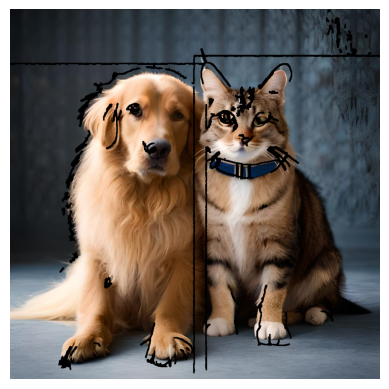

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the original image and annotated image
original_image = cv2.imread('original_image.jpg')
annotated_image = cv2.imread('fully_annotated_image.jpg')

# Convert images to grayscale
original_gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
annotated_gray = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2GRAY)

# Apply edge detection to the annotated grayscale image
edges = cv2.Canny(annotated_gray, 100, 200)

# Dilate the edges to make them thicker
dilated_edges = cv2.dilate(edges, None, iterations=2)

# Invert the dilated edges image to create a mask for the cat annotation
cat_mask = cv2.bitwise_not(dilated_edges)

# Convert the annotated image and mask to the same data type as the original image
annotated_image = annotated_image.astype(np.uint8)
cat_mask = cat_mask.astype(np.uint8)

# Resize the mask to match the dimensions of the original image
cat_mask = cv2.resize(cat_mask, (original_image.shape[1], original_image.shape[0]))

# Apply the cat mask to the original image to extract the cat annotation
cat_annotation = cv2.bitwise_and(original_image, original_image, mask=cat_mask)

# Display the extracted cat annotation
plt.imshow(cv2.cvtColor(cat_annotation, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


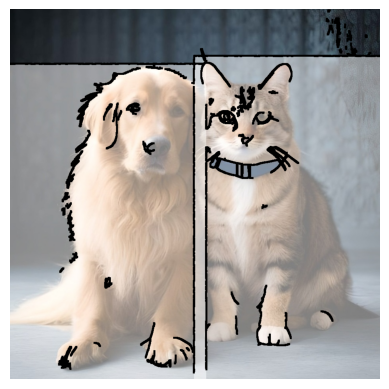

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the original image and annotated image
original_image = cv2.imread('original_image.jpg')
annotated_image = cv2.imread('fully_annotated_image.jpg')

# Convert images to grayscale
original_gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
annotated_gray = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2GRAY)

# Apply edge detection to the annotated grayscale image
edges = cv2.Canny(annotated_gray, 100, 200)

# Dilate the edges to make them thicker
dilated_edges = cv2.dilate(edges, None, iterations=2)

# Create a mask for the cat annotation
cat_mask = dilated_edges.copy()

# Invert the cat mask to de-annotate the dog part
cat_mask = cv2.bitwise_not(cat_mask)

# Apply the cat mask to the original image to extract the cat annotation
cat_annotation = cv2.bitwise_and(annotated_image, annotated_image, mask=cat_mask)

# Display the extracted cat annotation
plt.imshow(cv2.cvtColor(cat_annotation, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the original image and annotated image
original_image = cv2.imread('original_image.jpg')
annotated_image = cv2.imread('fully_annotated_image.jpg')

# Convert images to grayscale
original_gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
annotated_gray = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2GRAY)

# Apply edge detection to the annotated grayscale image
edges = cv2.Canny(annotated_gray, 100, 200)

# Dilate the edges to make them thicker
dilated_edges = cv2.dilate(edges, None, iterations=2)

# Create a mask for the cat annotation
cat_mask = dilated_edges.copy()

# Apply the cat mask to the original image to extract the cat annotation
cat_annotation = cv2.bitwise_and(original_image, original_image, mask=cat_mask)

# Display the extracted cat annotation
plt.imshow(cv2.cvtColor(cat_annotation, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


error: ignored

In [ ]:
#**********************************************************************************************************
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the original image and annotated image
original_image = cv2.imread('original_image.jpg')
annotated_image = cv2.imread('fully_annotated_image.jpg')

# Convert images to grayscale
original_gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
annotated_gray = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2GRAY)

# Apply edge detection to the annotated grayscale image
edges = cv2.Canny(annotated_gray, 100, 100)

# Create a mask for the cat annotation
cat_mask = edges.copy()

# Convert the mask to a binary mask
cat_mask[cat_mask > 0] = 255

# Convert the mask to the same data type as the original image
cat_mask = cat_mask.astype(np.uint8)

# Apply the cat mask to the original image to extract the cat annotation
cat_annotation = cv2.bitwise_and(original_image, original_image, mask=cat_mask)

# Display the extracted cat annotation
plt.imshow(cv2.cvtColor(cat_annotation, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


error: ignored

In [ ]:
# Apply the cat mask to the original image to extract the cat annotation
cat_annotation = cv2.bitwise_and(original_image, original_image, mask=cat_mask)

# Convert the cat annotation to RGB color space for visualization
cat_annotation_rgb = cv2.cvtColor(cat_annotation, cv2.COLOR_BGR2RGB)

# Display the extracted cat annotation
plt.imshow(cat_annotation_rgb)
plt.axis('off')
plt.show()

error: ignored

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the original image and annotated image
original_image = cv2.imread('original_image.jpg')
annotated_image = cv2.imread('fully_annotated_image.jpg')

# Resize the annotated image to match the size of the original image
annotated_image = cv2.resize(annotated_image, (original_image.shape[1], original_image.shape[0]))

# Convert images to grayscale
original_gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
annotated_gray = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2GRAY)

# Apply edge detection to the annotated grayscale image
edges = cv2.Canny(annotated_gray, 100, 100)

# Create a mask for the cat annotation
cat_mask = edges.copy()

# Convert the mask to a binary mask
cat_mask[cat_mask > 0] = 255

# Convert the mask to the same data type as the original image
cat_mask = cat_mask.astype(np.uint8)

print(type(cat_mask))
cv2.imwrite('cat.jpg', cat_mask)

# # Apply the cat mask to the original image to extract the cat annotation
# cat_annotation = cv2.bitwise_and(original_image, original_image, mask=cat_mask)

# # Display the extracted cat annotation
# plt.imshow(cv2.cvtColor(cat_annotation, cv2.COLOR_BGR2RGB))
# plt.axis('off')
# plt.show()


<class 'numpy.ndarray'>


True

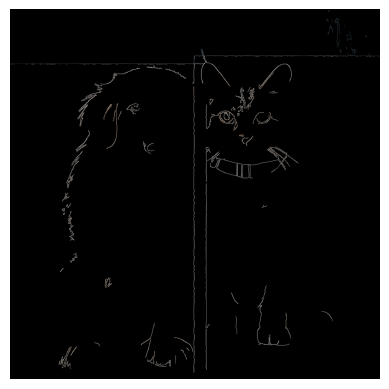

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the original image and annotated image
original_image = cv2.imread('original_image.jpg')
annotated_image = cv2.imread('fully_annotated_image.jpg')

# Convert images to grayscale
original_gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
annotated_gray = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2GRAY)

# Apply edge detection to the annotated grayscale image
edges = cv2.Canny(annotated_gray, 100, 200)

# Threshold the edges to create a binary mask for the cat annotation
_, cat_mask = cv2.threshold(edges, 0, 255, cv2.THRESH_BINARY)

# Apply the cat mask to the original image to extract the cat annotation
cat_annotation = cv2.bitwise_and(annotated_image, annotated_image, mask=cat_mask)

# Display the extracted cat annotation
plt.imshow(cv2.cvtColor(cat_annotation, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


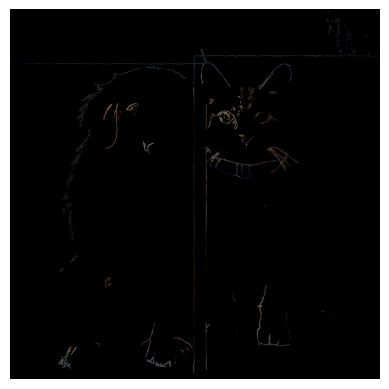

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the original image and annotated image
original_image = cv2.imread('original_image.jpg')
annotated_image = cv2.imread('fully_annotated_image.jpg')

# Convert the annotated image to grayscale
annotated_gray = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2GRAY)

# Apply edge detection to the annotated grayscale image
edges = cv2.Canny(annotated_gray, 100, 200)

# Create a mask for the cat annotation
cat_mask = edges.copy()

# Convert the mask to a binary mask
cat_mask[cat_mask > 0] = 255

# Resize the cat mask to match the dimensions of the original image
resized_cat_mask = cv2.resize(cat_mask, (original_image.shape[1], original_image.shape[0]))

# Convert the resized mask to 3 channels for compatibility with the original image
cat_mask_rgb = cv2.cvtColor(resized_cat_mask, cv2.COLOR_GRAY2BGR)

# Apply the cat mask to the original image to extract the cat annotation
cat_annotation = cv2.bitwise_and(original_image, cat_mask_rgb)

# Display the extracted cat annotation
plt.imshow(cv2.cvtColor(cat_annotation, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


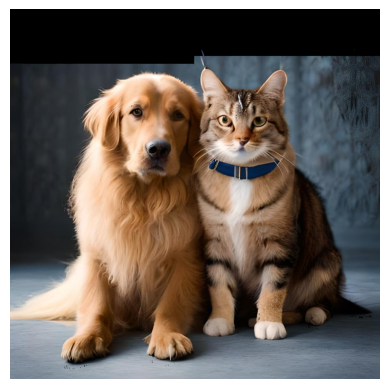

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the original image and annotated image
original_image = cv2.imread('original_image.jpg')
annotated_image = cv2.imread('fully_annotated_image.jpg')

# Convert the annotated image to grayscale
annotated_gray = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2GRAY)

# Define the threshold for the cat annotation (adjust as needed)
threshold = 128

# Create a binary mask for the cat annotation
cat_mask = np.where(annotated_gray > threshold, 255, 0).astype(np.uint8)

# Resize the cat mask to match the dimensions of the original image
resized_cat_mask = cv2.resize(cat_mask, (original_image.shape[1], original_image.shape[0]))

# Convert the resized mask to 3 channels for compatibility with the original image
cat_mask_rgb = cv2.cvtColor(resized_cat_mask, cv2.COLOR_GRAY2BGR)

# Apply the cat mask to the original image to extract the cat annotation
cat_annotation = cv2.bitwise_and(original_image, cat_mask_rgb)

# Display the extracted cat annotation
plt.imshow(cv2.cvtColor(cat_annotation, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


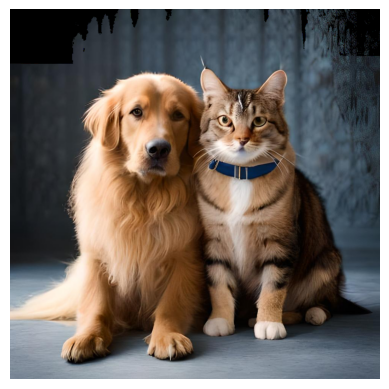

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the original image and annotated image
original_image = cv2.imread('original_image.jpg')
annotated_image = cv2.imread('fully_annotated_image.jpg')

# Convert the annotated image to grayscale
annotated_gray = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2GRAY)

# Define the threshold for the cat annotation (adjust as needed)
threshold = 50

# Create a binary mask for the cat annotation
cat_mask = np.where(annotated_gray > threshold, 255, 0).astype(np.uint8)

# Create a binary mask for the dog annotation
# dog_mask = np.where(annotated_gray <= threshold, 255, 0).astype(np.uint8)

# Convert the masks to 3 channels for compatibility with the original image
cat_mask_rgb = cv2.cvtColor(cat_mask, cv2.COLOR_GRAY2BGR)
# dog_mask_rgb = cv2.cvtColor(dog_mask, cv2.COLOR_GRAY2BGR)
resized_cat_mask = cv2.resize(cat_mask_rgb, (original_image.shape[1], original_image.shape[0]))


# Apply the masks to the original image to extract the annotations
cat_annotation = cv2.bitwise_and(original_image, resized_cat_mask)
# dog_deannotation = cv2.bitwise_and(original_image, dog_mask_rgb)

# Display the extracted cat annotation
plt.imshow(cv2.cvtColor(cat_annotation, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Display the de-annotated dog region
# plt.imshow(cv2.cvtColor(dog_deannotation, cv2.COLOR_BGR2RGB))
# plt.axis('off')
# plt.show()

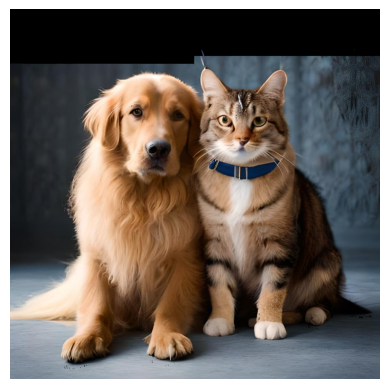

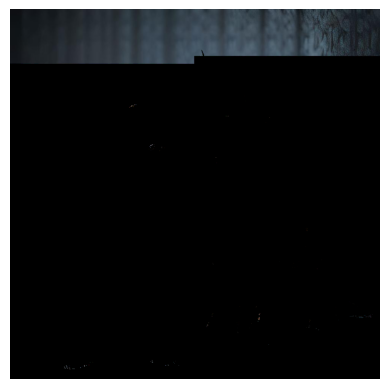

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the original image and annotated image
original_image = cv2.imread('original_image.jpg')
annotated_image = cv2.imread('fully_annotated_image.jpg')

# Convert the annotated image to grayscale
annotated_gray = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2GRAY)

# Define the threshold for the cat annotation (adjust as needed)
threshold = 128

# Create a binary mask for the cat annotation
cat_mask = np.where(annotated_gray > threshold, 255, 0).astype(np.uint8)

# Resize the cat mask to match the dimensions of the original image
resized_cat_mask = cv2.resize(cat_mask, (original_image.shape[1], original_image.shape[0]))

# Create a binary mask for the dog annotation
dog_mask = cv2.bitwise_not(resized_cat_mask)

# Convert the masks to 3 channels for compatibility with the original image
cat_mask_rgb = cv2.cvtColor(resized_cat_mask, cv2.COLOR_GRAY2BGR)
dog_mask_rgb = cv2.cvtColor(dog_mask, cv2.COLOR_GRAY2BGR)

# Apply the masks to the original image to extract the annotations
cat_annotation = cv2.bitwise_and(original_image, cat_mask_rgb)
dog_deannotation = cv2.bitwise_and(original_image, dog_mask_rgb)

# Display the extracted cat annotation
plt.imshow(cv2.cvtColor(cat_annotation, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Display the de-annotated dog region
plt.imshow(cv2.cvtColor(dog_deannotation, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the original image and annotated image
original_image = cv2.imread('original_image.jpg')
annotated_image = cv2.imread('fully_annotated_image.jpg')

# Convert the annotated image to grayscale
annotated_gray = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2GRAY)

# Define the threshold for the cat annotation (adjust as needed)
threshold = 128

# Create a binary mask for the cat annotation
cat_mask = np.where(annotated_gray > threshold, 255, 0).astype(np.uint8)

# Create a mask for the dog annotation (inverse of the cat mask)
dog_mask = cv2.bitwise_not(cat_mask)

# Convert the cat mask to 3 channels for compatibility with the original image
cat_mask_rgb = cv2.cvtColor(cat_mask, cv2.COLOR_GRAY2BGR)

# Apply the cat mask to the original image to extract the cat annotation
cat_annotation = cv2.bitwise_and(original_image, cat_mask_rgb)

# Apply the dog mask to the original image to remove the dog annotation
dog_deannotation = cv2.bitwise_and(original_image, cv2.bitwise_not(cat_mask_rgb))

# Display the extracted cat annotation
plt.imshow(cv2.cvtColor(cat_annotation, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Display the de-annotated dog region
plt.imshow(cv2.cvtColor(dog_deannotation, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


error: ignored

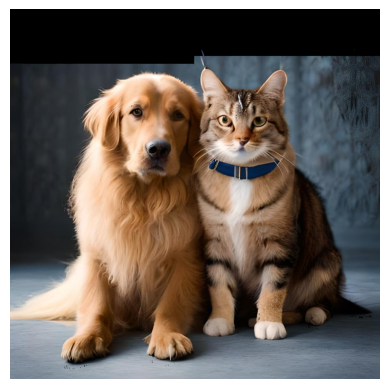

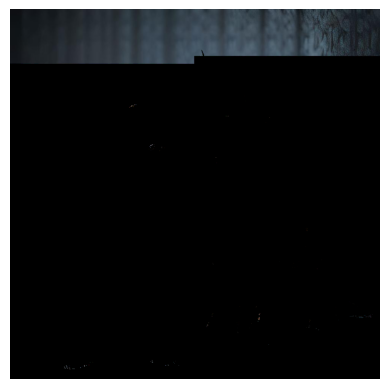

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the original image and annotated image
original_image = cv2.imread('original_image.jpg')
annotated_image = cv2.imread('fully_annotated_image.jpg')

# Convert the annotated image to grayscale
annotated_gray = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2GRAY)

# Define the threshold for the cat annotation (adjust as needed)
threshold = 128

# Create a binary mask for the cat annotation
cat_mask = np.where(annotated_gray > threshold, 255, 0).astype(np.uint8)

# Resize the cat mask to match the dimensions of the original image
resized_cat_mask = cv2.resize(cat_mask, (original_image.shape[1], original_image.shape[0]))

# Create a mask for the dog annotation (inverse of the cat mask)
dog_mask = cv2.bitwise_not(resized_cat_mask)

# Convert the cat mask to 3 channels for compatibility with the original image
cat_mask_rgb = cv2.cvtColor(resized_cat_mask, cv2.COLOR_GRAY2BGR)

# Apply the cat mask to the original image to extract the cat annotation
cat_annotation = cv2.bitwise_and(original_image, cat_mask_rgb)

# Apply the dog mask to the original image to remove the dog annotation
dog_deannotation = cv2.bitwise_and(original_image, cv2.bitwise_not(cat_mask_rgb))

# Display the extracted cat annotation
plt.imshow(cv2.cvtColor(cat_annotation, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Display the de-annotated dog region
plt.imshow(cv2.cvtColor(dog_deannotation, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [ ]:
import cv2
import numpy as np

image = cv2.imread('/content/fully_annotated_image.jpg')
grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(grayscale, (5, 5), 0)

edges = cv2.Canny(blurred,50, 255)

kernel = np.ones((5, 5), np.uint8)

dilated = cv2.dilate(edges, kernel, iterations=1)
# kernel = np.ones((5, 5), np.uint8)
mask = cv2.bitwise_not(dilated)
result = cv2.bitwise_and(image, image, mask=mask)
background = cv2.imread('/content/original_image.jpg')

og = cv2.resize(dilated,(background.shape[1],background.shape[0]))
masked_background = cv2.bitwise_and(background, background, mask=og)

res = cv2.resize(result,(masked_background.shape[1],masked_background.shape[0]))
result = cv2.bitwise_or(res, masked_background)
cv2.imwrite('Result.jpg', result)